In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("clean_credit_risk_dataset3.csv")
df.head()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,default,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,emp_length_missing,...,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,22,59000,123.0,29800,16.02,1,0.59,1,3,0,...,0,0,1,0,0,0,1,0,0,0
1,21,9600,5.0,1000,11.14,0,0.10,0,2,0,...,0,0,0,0,1,0,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,0,3,0,...,0,1,0,0,0,1,0,0,0,0
3,23,65500,4.0,29800,15.23,1,0.53,0,2,0,...,0,1,0,0,0,1,0,0,0,0
4,24,54400,8.0,29800,14.27,1,0.55,1,4,0,...,0,1,0,0,0,1,0,0,0,0


In [2]:
df.describe()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,default,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,emp_length_missing,...,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
count,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,...,32581.000000,32581.000000,32581.000000,32581.000000,32581.00000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.729137,64335.810626,4.767994,9556.368743,10.999018,0.218164,0.170203,0.176330,5.804211,0.027470,...,0.110647,0.186336,0.169455,0.175532,0.32077,0.198214,0.111292,0.029588,0.007397,0.001964
std,6.268787,37806.237543,4.087372,6202.519039,3.052916,0.413006,0.106782,0.381106,4.055001,0.163451,...,0.313700,0.389383,0.375159,0.380427,0.46678,0.398660,0.314498,0.169450,0.085688,0.044278
min,20.000000,4000.000000,0.000000,500.000000,5.420000,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,38500.000000,2.000000,5000.000000,8.490000,0.000000,0.090000,0.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,55000.000000,4.000000,8000.000000,10.990000,0.000000,0.150000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.000000,79200.000000,7.000000,12200.000000,13.110000,0.000000,0.230000,0.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,225200.000000,123.000000,29800.000000,18.390000,1.000000,0.830000,1.000000,30.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Default vs Non-Default Count')

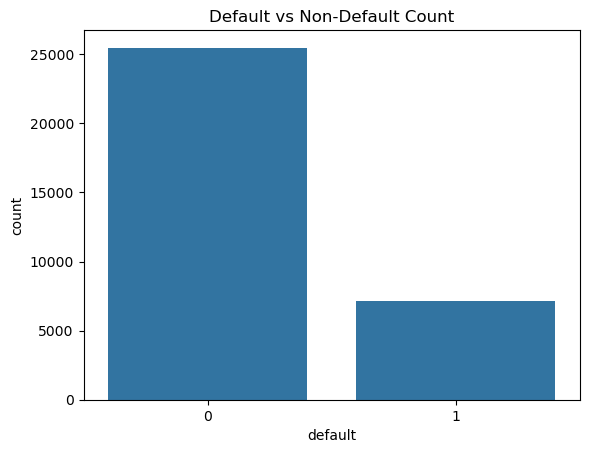

In [3]:
sns.countplot(x='default', data=df)
plt.title("Default vs Non-Default Count")


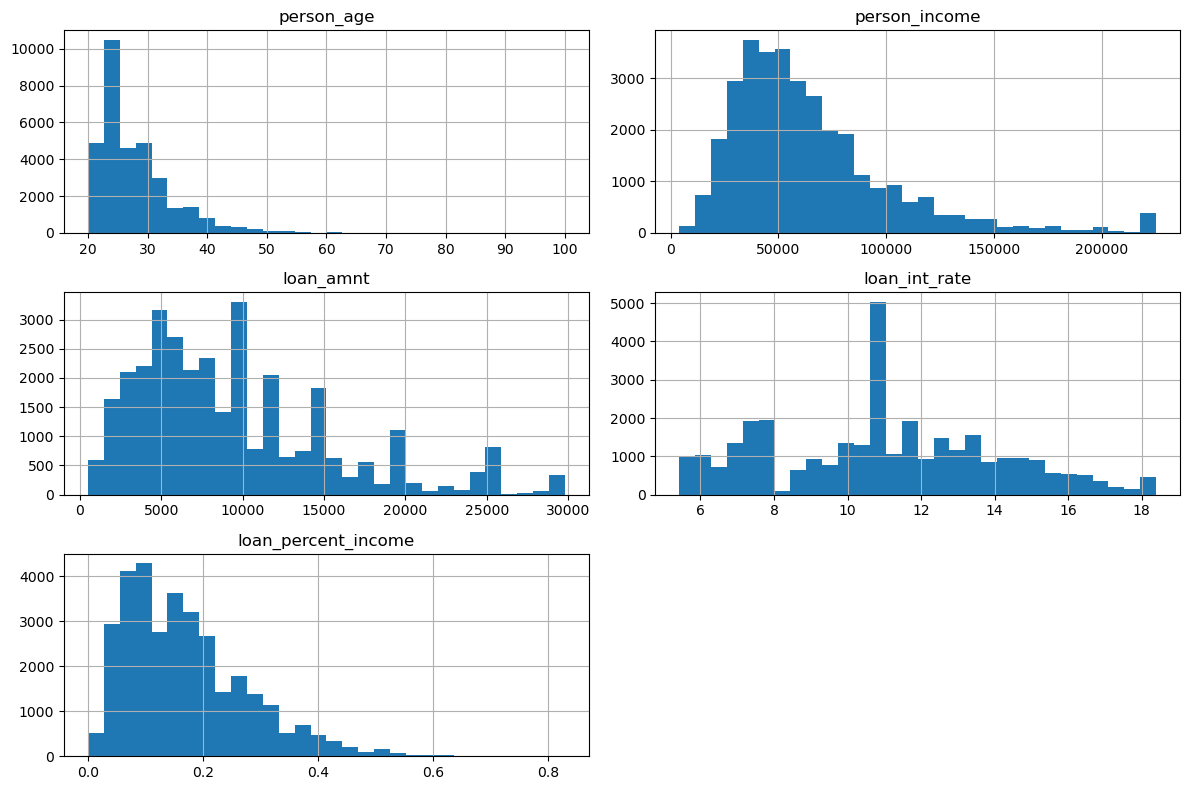

In [4]:
#Understand shape & outliers
num_cols = ['person_age','person_income','loan_amnt','loan_int_rate','loan_percent_income']

df[num_cols].hist(figsize=(12,8), bins=30)
plt.tight_layout()
plt.show()

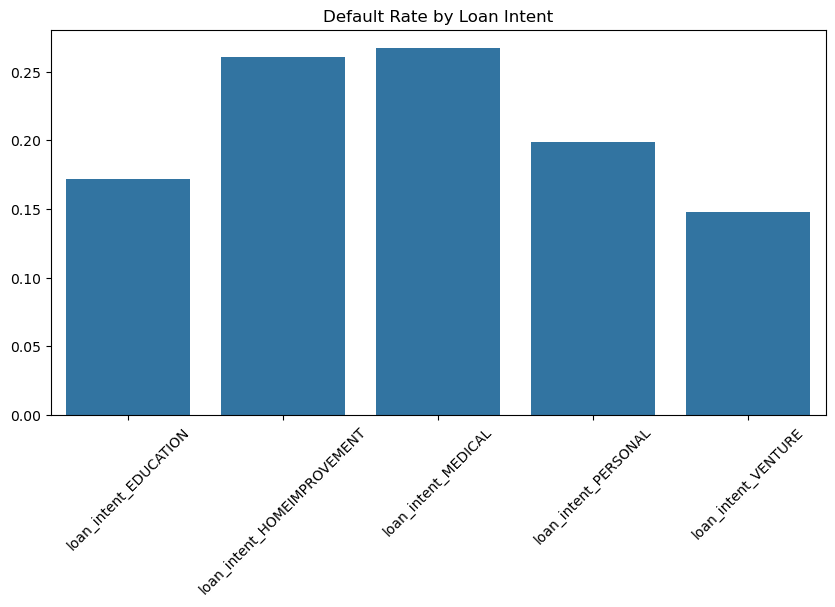

In [5]:
#Helps detect high-risk groups
#Example — Loan Intent
loan_intent_cols = [col for col in df.columns if 'loan_intent_' in col]

avg_default = {col: df.groupby(col)['default'].mean()[1] for col in loan_intent_cols}

plt.figure(figsize=(10,5))
sns.barplot(x=list(avg_default.keys()), y=list(avg_default.values()))
plt.xticks(rotation=45)
plt.title("Default Rate by Loan Intent")
plt.show()


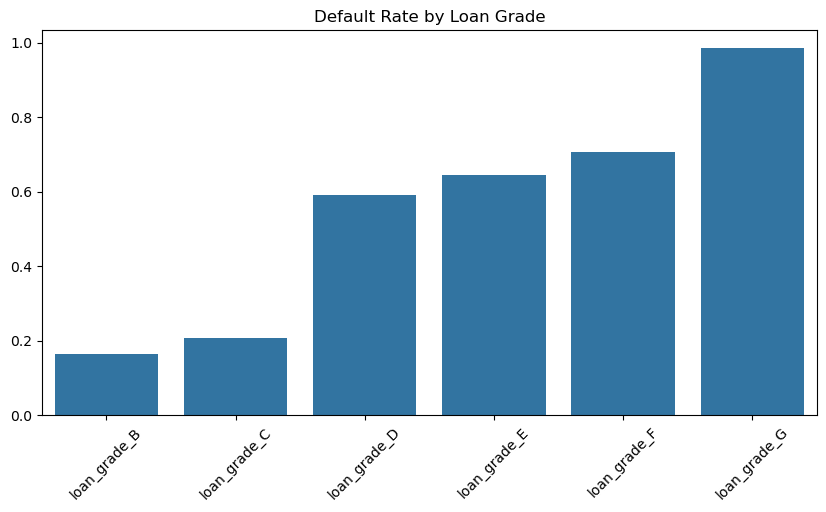

In [6]:
loan_grade_cols = [col for col in df.columns if 'loan_grade_' in col]

avg_default_grade = {col: df.groupby(col)['default'].mean()[1] for col in loan_grade_cols}

plt.figure(figsize=(10,5))
sns.barplot(x=list(avg_default_grade.keys()), y=list(avg_default_grade.values()))
plt.xticks(rotation=45)
plt.title("Default Rate by Loan Grade")
plt.show()


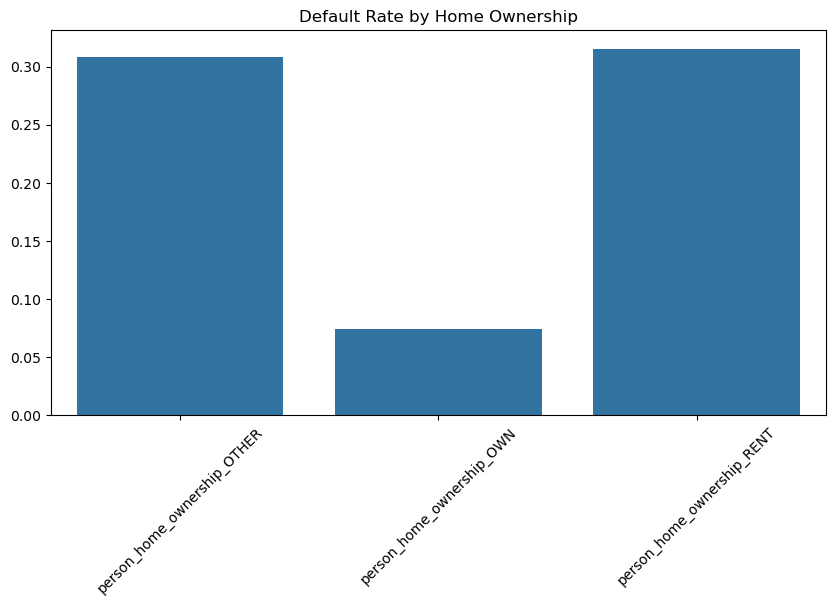

In [7]:
#Home Ownership vs Default, which gives insights into customer stability.


home_cols = [col for col in df.columns if 'person_home_ownership_' in col]

avg_default_home = {col: df.groupby(col)['default'].mean()[1] for col in home_cols}

plt.figure(figsize=(10,5))
sns.barplot(x=list(avg_default_home.keys()), y=list(avg_default_home.values()))
plt.xticks(rotation=45)
plt.title("Default Rate by Home Ownership")
plt.show()

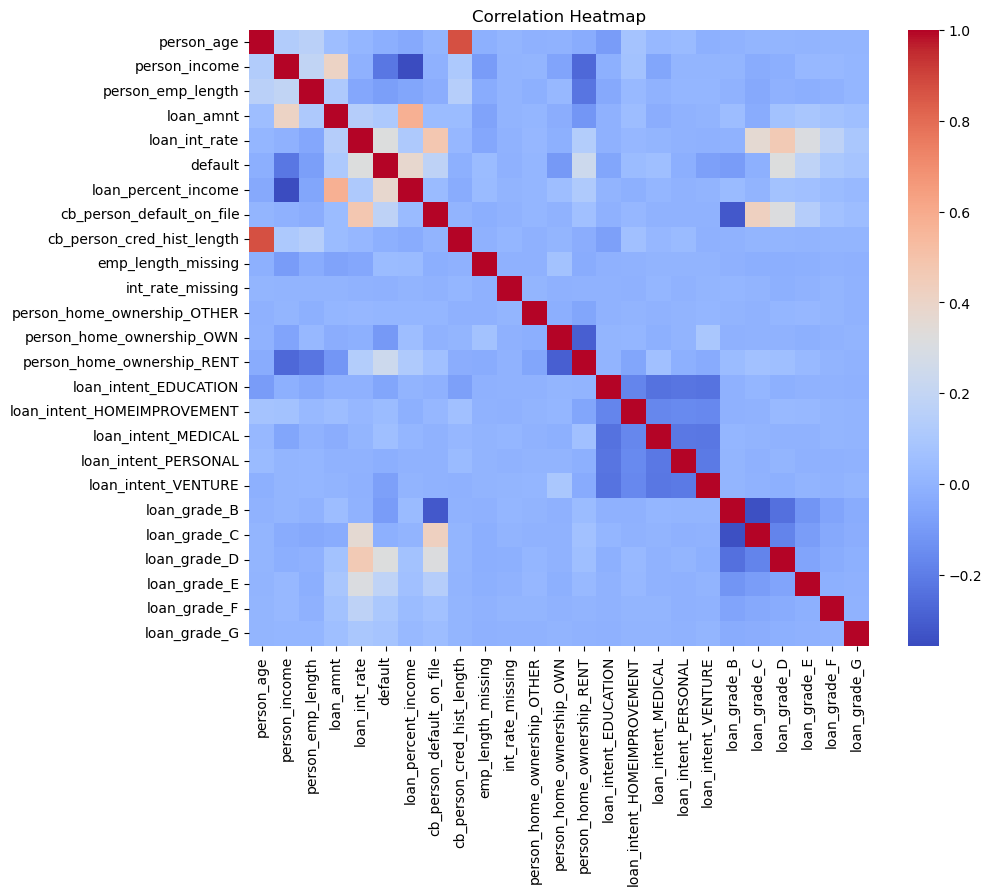

In [8]:
#Correlation Heatmap

#This shows how features relate to each other and helps detect multicollinearity.

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

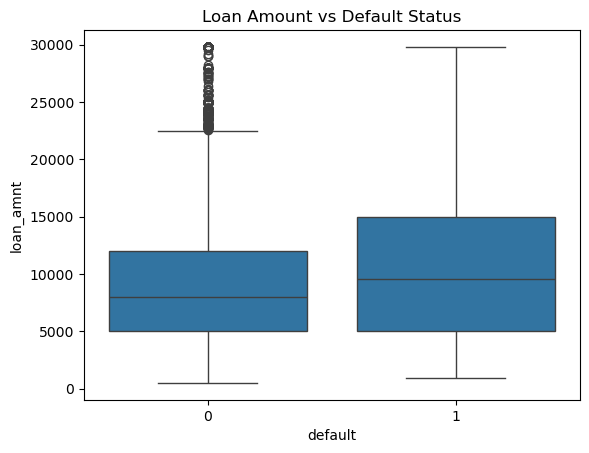

In [9]:
#WHAT: Visualizing feature distributions for default vs non-default
#WHY: Helps understand model separation power

#Example — Loan Amount vs Default

sns.boxplot(x='default', y='loan_amnt', data=df)
plt.title("Loan Amount vs Default Status")
plt.show()

In [10]:
#Step 5 machine learning

In [11]:
#5.1 Train/Test Split
from sklearn.model_selection import train_test_split
# Separate X and y
X=df.drop('default',axis=1)
y=df['default']

#split dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [12]:
#5.2 Scaling Numeric Features
from sklearn.preprocessing import StandardScaler

numeric_cols = ['person_age','person_income','loan_amnt','loan_int_rate','loan_percent_income']

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


In [13]:
#5.3 — Baseline Model Setup
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8677305508669634
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      5095
           1       0.77      0.56      0.65      1422

    accuracy                           0.87      6517
   macro avg       0.83      0.76      0.78      6517
weighted avg       0.86      0.87      0.86      6517



In [14]:
#STEP 6 — RANDOM FOREST MODEL
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf = RandomForestClassifier(n_estimators=200,
                            max_depth=None,
                            class_weight='balanced',
                            random_state=42)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.9309498235384379
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5095
           1       0.96      0.71      0.82      1422

    accuracy                           0.93      6517
   macro avg       0.94      0.85      0.89      6517
weighted avg       0.93      0.93      0.93      6517



In [15]:
#step 7 XGBoost
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve


In [16]:
#7.2 – Compute scale_pos_weight

#This helps XGBoost pay more attention to the minority class (defaults).

# Compute scale_pos_weight = (negative / positive) in training data
neg, pos = (y_train == 0).sum(), (y_train == 1).sum()
scale_pos_weight = neg / pos
scale_pos_weight

np.float64(3.5838902567710167)

In [17]:
#7.3 – Train XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=300,          # number of trees
    max_depth=4,              # tree depth (controls complexity)
    learning_rate=0.05,       # step size (smaller = more stable)
    subsample=0.8,            # row sampling for each tree
    colsample_bytree=0.8,     # feature sampling for each tree
    scale_pos_weight=scale_pos_weight,
    objective='binary:logistic',
    eval_metric='logloss',    # avoid warning
    random_state=42,
    n_jobs=-1                 # use all cores
)

xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]  # for ROC-AUC

In [18]:
#7.4 – Evaluate Classification Metrics
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

Accuracy: 0.9027159736074881
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      5095
           1       0.77      0.79      0.78      1422

    accuracy                           0.90      6517
   macro avg       0.86      0.86      0.86      6517
weighted avg       0.90      0.90      0.90      6517



In [19]:
#7.5 – ROC-AUC Score

#AUC is very important in credit risk — it measures how well the model separates good vs bad borrowers across all thresholds.

auc_xgb = roc_auc_score(y_test, y_proba_xgb)
print("ROC-AUC (XGBoost):", auc_xgb)

ROC-AUC (XGBoost): 0.9422697302586993


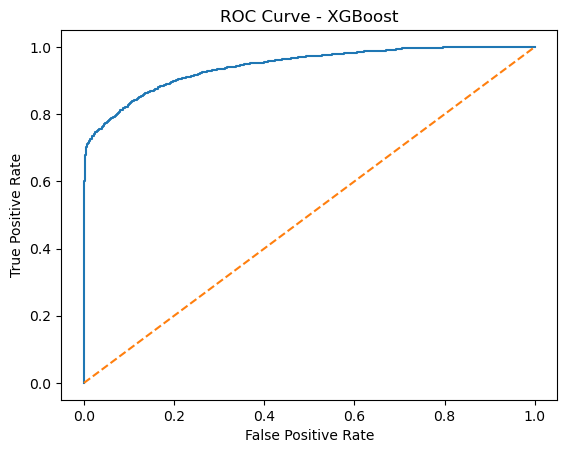

In [20]:
#Plot ROC curve:

fpr, tpr, _ = roc_curve(y_test, y_proba_xgb)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.show()

In [21]:
import xgboost
import shap

print("XGBoost:", xgboost.__version__)
print("SHAP:", shap.__version__)


XGBoost: 3.1.2
SHAP: 0.47.2


PermutationExplainer explainer: 1001it [04:03,  4.11it/s]                          
C:\Users\Mohd Haseeb\AppData\Local\Temp\ipykernel_30460\3967531365.py:17: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values[:, :, 1], X_sample)


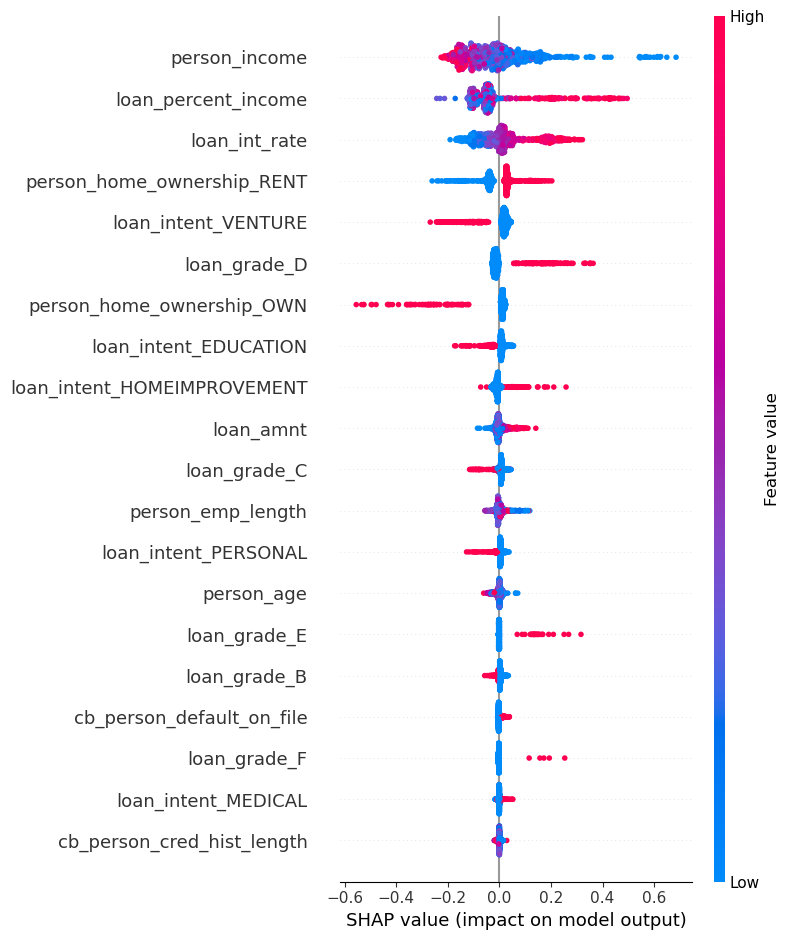

In [22]:
#step 8.1 — Prepare SHAP for XGBoost
import shap

# SHAP explainer using predict_proba (callable)
explainer = shap.Explainer(
    xgb_model.predict_proba,
    X_train
)

# Sample for speed
X_sample = X_test.sample(1000, random_state=42)

# Compute SHAP values
shap_values = explainer(X_sample)

# Global explanation
shap.summary_plot(shap_values[:, :, 1], X_sample)


PermutationExplainer explainer: 1001it [01:57,  7.83it/s]                          
C:\Users\Mohd Haseeb\AppData\Local\Temp\ipykernel_30460\1168321658.py:5: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_sample)
C:\Users\Mohd Haseeb\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:726: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
C:\Users\Mohd Haseeb\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:746: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in t

<Figure size 640x480 with 0 Axes>

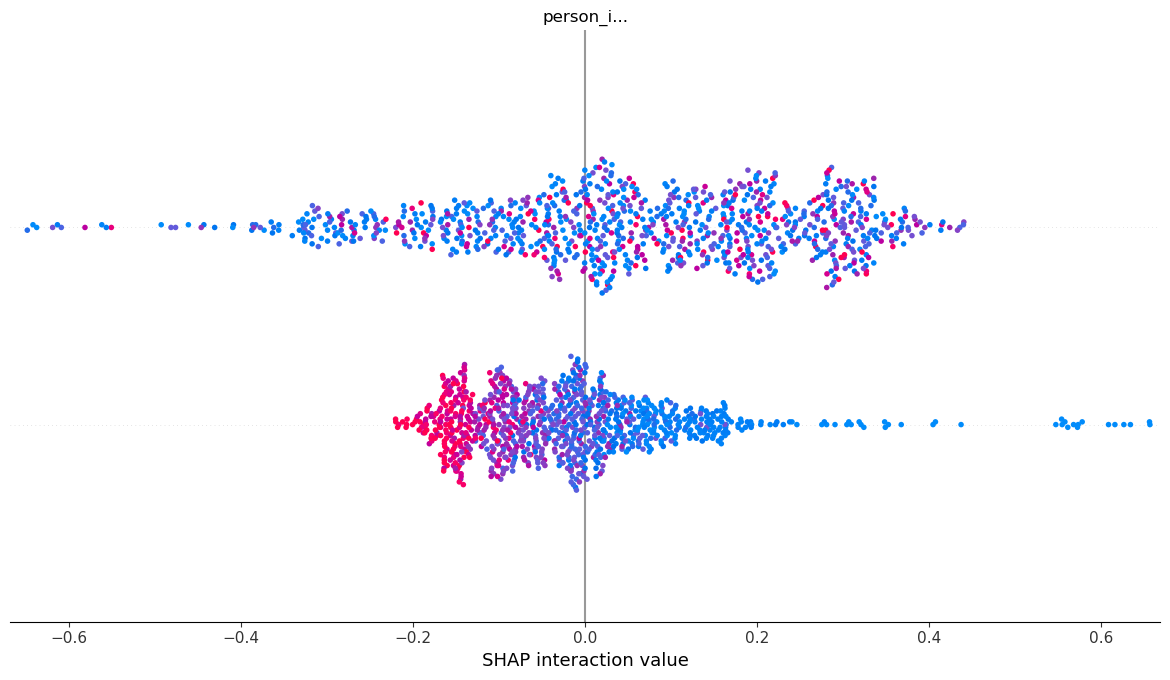

In [23]:
#8.2 — Global Feature Importance (Overall Risk Drivers)
#Seeing which features matter most overall across all customers.
shap_values = explainer.shap_values(X_sample)

shap.summary_plot(shap_values, X_sample)




In [24]:
#Step 9.1 — Get Probability of Default (PD)
#What we are doing
#Using the trained XGBoost model to get Probability of Default for each applicant
# Probability of default (class = 1)
pd_scores = xgb_model.predict_proba(X_test)[:, 1]

# Add PD to a dataframe
risk_df = X_test.copy()
risk_df['actual_default'] = y_test.values
risk_df['pd_score'] = pd_scores

risk_df.head()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,emp_length_missing,int_rate_missing,...,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,actual_default,pd_score
6616,-0.914633,-0.377406,6.0,-0.572521,0.290740,-0.469815,0,2,0,0,...,1,0,1,0,0,0,0,0,0,0.202020
21802,0.691141,-0.324569,0.0,-0.390396,-1.152065,-0.282559,0,10,0,0,...,1,0,0,0,0,0,0,0,0,0.119772
31886,1.494028,3.717495,3.0,1.370154,-0.201126,-0.750700,0,14,0,0,...,0,0,1,0,0,0,0,0,0,0.127174
17799,-0.272324,0.943530,5.0,2.341491,-0.004379,0.653724,0,4,0,0,...,0,0,1,0,0,0,0,0,0,0.178529
5207,-0.754056,-0.526936,0.0,-1.058190,0.648162,-0.937956,1,3,0,0,...,0,1,0,1,0,0,0,0,0,0.014829


In [26]:
#9.2 Create Risk Buckets (PD Bands)
#What we are doing
#Converting continuous PD into discrete risk groups.
def assign_risk_bucket(pd):
    if pd < 0.30:
        return 'Low Risk'
    elif pd < 0.60:
        return 'Medium Risk'
    else:
        return 'High Risk'

risk_df['risk_bucket'] = risk_df['pd_score'].apply(assign_risk_bucket)
risk_df.head()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,emp_length_missing,int_rate_missing,...,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,actual_default,pd_score,risk_bucket
6616,-0.914633,-0.377406,6.0,-0.572521,0.290740,-0.469815,0,2,0,0,...,0,1,0,0,0,0,0,0,0.202020,Low Risk
21802,0.691141,-0.324569,0.0,-0.390396,-1.152065,-0.282559,0,10,0,0,...,0,0,0,0,0,0,0,0,0.119772,Low Risk
31886,1.494028,3.717495,3.0,1.370154,-0.201126,-0.750700,0,14,0,0,...,0,1,0,0,0,0,0,0,0.127174,Low Risk
17799,-0.272324,0.943530,5.0,2.341491,-0.004379,0.653724,0,4,0,0,...,0,1,0,0,0,0,0,0,0.178529,Low Risk
5207,-0.754056,-0.526936,0.0,-1.058190,0.648162,-0.937956,1,3,0,0,...,1,0,1,0,0,0,0,0,0.014829,Low Risk


In [27]:
#9.3 — Validate Risk Buckets (Very Important)
#What we are doing

#Checking if higher risk buckets actually contain more defaults.
bucket_analysis = risk_df.groupby('risk_bucket')['actual_default'].agg(
    count='count',
    default_rate='mean'
)

bucket_analysis

,count,default_rate
risk_bucket,,
High Risk,1242,0.863124
Low Risk,4112,0.032344
Medium Risk,1163,0.186586


In [31]:
#9.4 — Approval Logic (Simple Bank Rule)
#What we are doing

#Defining a decision rule based on risk bucket.

def loan_decision(bucket):
    if bucket == 'Low Risk':
        return 'Approve'
    elif bucket == 'Medium Risk':
        return 'Approve with Conditions'
    else:
        return 'Reject'

risk_df['loan_decision'] = risk_df['risk_bucket'].apply(loan_decision)
risk_df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,emp_length_missing,int_rate_missing,...,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,actual_default,pd_score,risk_bucket,loan_decision
6616,-0.914633,-0.377406,6.0,-0.572521,0.290740,-0.469815,0,2,0,0,...,1,0,0,0,0,0,0,0.202020,Low Risk,Approve
21802,0.691141,-0.324569,0.0,-0.390396,-1.152065,-0.282559,0,10,0,0,...,0,0,0,0,0,0,0,0.119772,Low Risk,Approve
31886,1.494028,3.717495,3.0,1.370154,-0.201126,-0.750700,0,14,0,0,...,1,0,0,0,0,0,0,0.127174,Low Risk,Approve
17799,-0.272324,0.943530,5.0,2.341491,-0.004379,0.653724,0,4,0,0,...,1,0,0,0,0,0,0,0.178529,Low Risk,Approve
5207,-0.754056,-0.526936,0.0,-1.058190,0.648162,-0.937956,1,3,0,0,...,0,1,0,0,0,0,0,0.014829,Low Risk,Approve


In [30]:
#9.5 — Portfolio View (Interview-Ready Insight)
#What we are doing

#Seeing how your loan portfolio is distributed.

portfolio_summary = risk_df['risk_bucket'].value_counts(normalize=True)
portfolio_summary

risk_bucket
Low Risk       0.630965
High Risk      0.190578
Medium Risk    0.178456
Name: proportion, dtype: float64

In [32]:
#step 10.1 — Define Risk-Based Interest Rates
#What we are doing

#Assigning higher interest rates to riskier customers.
#Why?

#Higher risk → higher compensation

#This is called risk-based pricing

#Core concept in retail banking
def assign_interest_rate(bucket):
    if bucket == 'Low Risk':
        return 0.10   # 10%
    elif bucket == 'Medium Risk':
        return 0.16   # 16%
    else:
        return 0.22   # 22%

risk_df['interest_rate'] = risk_df['risk_bucket'].apply(assign_interest_rate)

In [33]:
# 10.2 Expected Loss (Very Important Concept)
#Formula used by banks
#Expected Loss (EL)=𝑃𝐷×𝐿𝐺𝐷×𝐸𝐴𝐷
#Where:
#PD = Probability of Default (your model output)
#LGD = Loss Given Default (assume 60%)
#EAD = Exposure at Default (loan amount)
LGD = 0.6  # assume 60% loss if default

risk_df['expected_loss'] = (
    risk_df['pd_score'] * LGD * risk_df['loan_amnt']
)

In [34]:
#10.3 — Expected Interest Income
#What we are doing

#Estimating how much money the bank earns from interest.

risk_df['expected_interest_income'] = (
    risk_df['loan_amnt'] * risk_df['interest_rate']
)

In [35]:
#10.4 — Expected Profit per Loan
#What we are doing

#Subtracting expected loss from expected interest income.

risk_df['expected_profit'] = (
    risk_df['expected_interest_income'] - risk_df['expected_loss']
)

In [36]:
#10.5 — Portfolio-Level View
#What we are doing

#Understanding overall portfolio performance by risk segment.

profit_summary = risk_df.groupby('risk_bucket').agg(
    total_loans=('loan_amnt', 'count'),
    avg_pd=('pd_score', 'mean'),
    avg_expected_profit=('expected_profit', 'mean')
)

profit_summary

,total_loans,avg_pd,avg_expected_profit
risk_bucket,,,
High Risk,1242,0.905775,-0.109460
Low Risk,4112,0.126030,-0.000134
Medium Risk,1163,0.413695,0.002335
